# **Exploratory and Predictive Analysis of Industrial Machine Failures**
Author: Gamze Esen Erdemir

##  **1. Introduction**   

In modern industrial, the reliability of machinery plays a critical role in ensuring smooth operations, reducing unexpected downtime, and optimizing productivity and profit. The process of predicting equipment failure, commonly known as **predictive maintenance**, allows organizations to fix issues before they occur, saving both time and costs.

This project focuses on analyzing real-world manufacturing sensor data from manufacturing sector in order to build a **predictive model** that classifies whether a machine will fail based on operational and environmental conditions such as:
- Air and process temperature
- Rotational speed
- Torque and tool wear levels

By combining sensor measurements with machine status data, the following specific aims are reached:
- To perform exploratory data analysis (EDA) to uncover relationships between machine parameters and failures,
- To handle missing data and prepare the dataset for modeling,
- To build a simple Logistic Regression model to classify failure risk.

Implementing predictive maintenance solutions not only saves organizations profits due to the lost productions, but also improves worker safety, increases operational longevity, and reduce unexpected interuptions. 

The primary goals of this model is to:
- Identify which factors most strongly correlate with machinery failure,
- Demonstrate how a simple machine learning model can classify failure risk based on sensor data,
- Provide a foundation for building smart monitoring systems in industrial environments.

#### **Acknowledgement**
I would like to thank the [UCI Machine Learning](https://archive.ics.uci.edu/) Repository for providing open access to the [AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset), which served as the foundation for this analysis.

I would like to thank Dr. Steven Livingstone for the course materials and lectures that guided the structure and methodology of this assignment.

I acknowledge the assistance of OpenAI, which supported idea generation and refinement of explanations during report development.

Image source: https://library.automationdirect.com/plcs-predictive-maintenance/

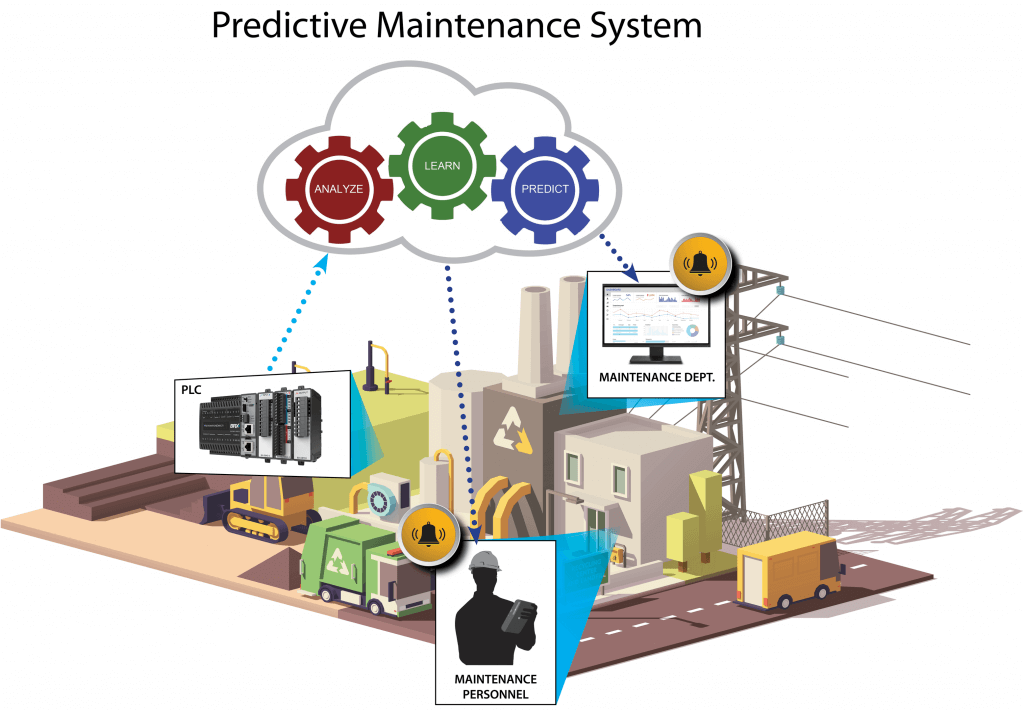

## **2. Methodology**
### **2.1. Data Collection**

The predictive maintenance data used in this study is obtained from the  [AI4I 2020 Predictive Maintenance Dataset](https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset) provided by the [UCI Machine Learning](https://archive.ics.uci.edu/) Repository.
This dataset contains 10,000 observations and 14 features, including both numerical and categorical variables. It offers a comprehensive representation of industrial machine conditions, allowing detailed analysis of operational parameters, machine states, and failure modes. This dataset is consisted of following parameters:

1. **UID**: Unique Identifier ranging from 1 to 10000

2. **Product ID**: Consisting of a letter L, M, or H for low, medium and high as product quality variants and a variant-specific serial number

3. **Type**: Consisting of a letter L, M, or H for low, medium and high as product quality variants

4. **Air temperature [K]**: Generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

5. **process temperature [K]**: Generated using a random walk process normalized to a standard deviation of 1.5 K, added to the air temperature plus 10 K

6. **Rotational speed [rpm]**: Calculated from a power of 2860 W, overlaid with a normally distributed noise

7. **Torque [Nm]**: Torque values are normally distributed around 40 Nm 

8. **Tool wear [min]**: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process

9. **Machine failure**: Label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true

**The machine failure consists of five independent failure modes**

10. **Tool wear failure (TWF)**: The tool will be replaced of fail at a randomly selected tool wear time

11. **Heat dissipation failure (HDF)**: Heat dissipation causes a process failure

12. **Power failure (PWF)**: The product of torque and rotational speed (in rad/s) equals the power required for the process

13. **Overstrain failure (OSF)**: if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain

14. **Random failures (RNF)**: each process has a chance of 0,1 % to fail regardless of its process parameters

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail. 

In [1]:
# import libraries
import pandas as pd  # data manipulation
import numpy as np   # numerical operations
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # enhanced data visualization
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.linear_model import LogisticRegression   # logistic regression model 
from sklearn.metrics import classification_report, confusion_matrix  # model evaluation
import warnings
warnings.filterwarnings('ignore')  # ignore warnings for cleaner output

In [2]:
# load dataset
df = pd.read_csv('ai4i2020.csv')

In [3]:
# display first five rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# display last ten rows of the dataset
df.tail(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9990,9991,L57170,L,298.8,308.5,1527,36.2,3,0,0,0,0,0,0
9991,9992,M24851,M,298.9,308.4,1827,26.1,5,0,0,0,0,0,0
9992,9993,L57172,L,298.8,308.4,1484,39.2,8,0,0,0,0,0,0
9993,9994,L57173,L,298.8,308.4,1401,47.3,10,0,0,0,0,0,0
9994,9995,L57174,L,298.8,308.3,1634,27.9,12,0,0,0,0,0,0
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
# display dataset dimensions
df.shape

(10000, 14)

In [6]:
# display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [7]:
# check for missing values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [8]:
# check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
# check unique values in each column
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

The dataset was thoroughly examined to ensure data quality and consistency. 

No missing (NaN) or duplicated values were found, confirming the integrity of the data. 

The dataset consists of two categorical and twelve numerical features. The categorical variables provide classification context, while the numerical variables contain measurable process and operational parameters.

In [10]:
# drop unnecessary columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

The UDI and Product ID columns were excluded from the analysis, as they serve only as identifiers and do not contribute meaningful information to the predictive modeling process.

### **2.2. Data Analysis**
After ensuring data quality through cleaning and preprocessing, the next step involved conducting an in-depth exploratory data analysis (EDA). This phase aimed to better understand the structure of the dataset, identify key patterns, relationships, and trends among variables, and uncover potential factors influencing machine failures.

Various statistical summaries and visualizations were employed to gain insights into the distribution of numerical features, correlations between operational parameters, and the impact of categorical variables on machine performance.

In [11]:
# display statistical summary of the dataset
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


A detailed summary of the dataset reveals stable and consistent operating conditions across most parameters.
The **air** and **process temperatures** remain well-controlled, averaging around **300 K** and **310 K**, with minimal variation. The **rotational speed** averages **1,539 rpm**, showing healthy variability that reflects different production cycles.

The **torque** levels range between **3.8 Nm** and **76.6 Nm**, with a mean close to **40 Nm**, suggesting balanced load distribution during operation. **Tool wear** varies more significantly from brand new tools to those reaching over **250 minutes** of usage indicating realistic maintenance scenarios within the dataset.

Machine failures account for roughly **3.4%** of all records, with individual failure types (**TWF, HDF, PWF, OSF, RNF**) occurring at very low frequencies. This demonstrates that most equipment operated under normal conditions, providing a strong foundation for predictive modeling and reliability assessment.

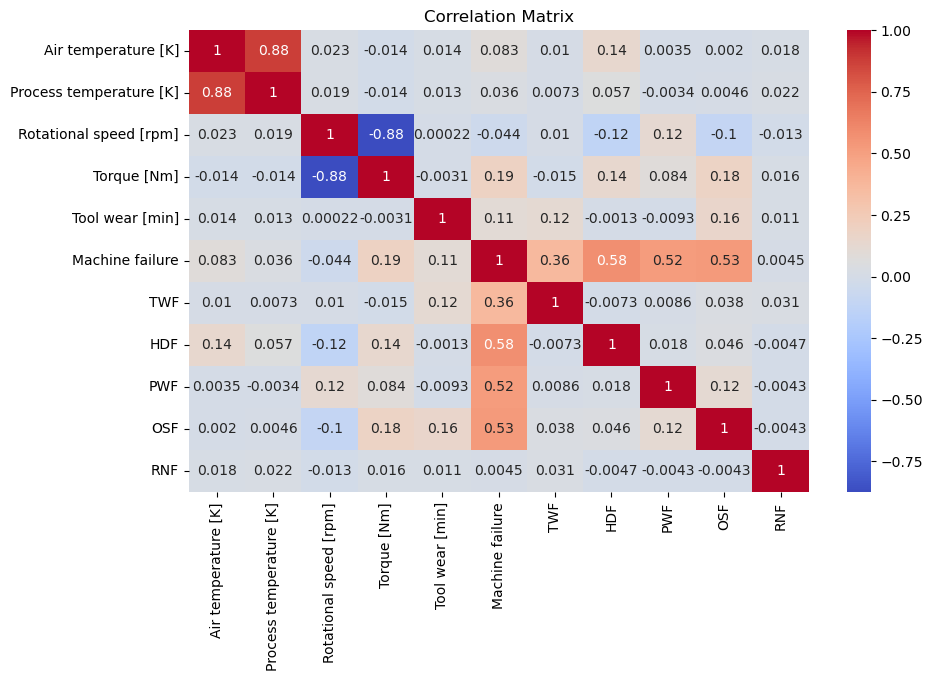

In [12]:
# heatmap of correlation matrix for numerical features
numeric = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix provides insight into the relationships between operational parameters and machine failure types.

A strong **positive correlation (0.88)** is observed between **air temperature** and **process temperature**, indicating that both vary together under consistent environmental or process conditions. Conversely, **rotational speed** and **torque** show a **strong negative correlation (-0.88)**, meaning that as speed increases, the torque required decreases, a typical trend in rotating machinery dynamics.

Moderate correlations are also evident between **torque** and specific failure types such as **OSF (0.53)** and **HDF (0.58)**, suggesting that higher torque levels may contribute to these particular failure events. Similarly, **tool wear** and **machine failure (0.11)** show a weak but notable positive correlation, implying that tool degradation slightly increases the likelihood of failure over time.

Overall, the correlation analysis highlights that while environmental factors remain stable, variations in torque and rotational speed are more influential in predicting failure patterns. These insights will guide the feature selection and modeling stages in developing an effective predictive maintenance model.

In [13]:
# unique values in Type
df['Type'].unique()
# value counts of Type
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

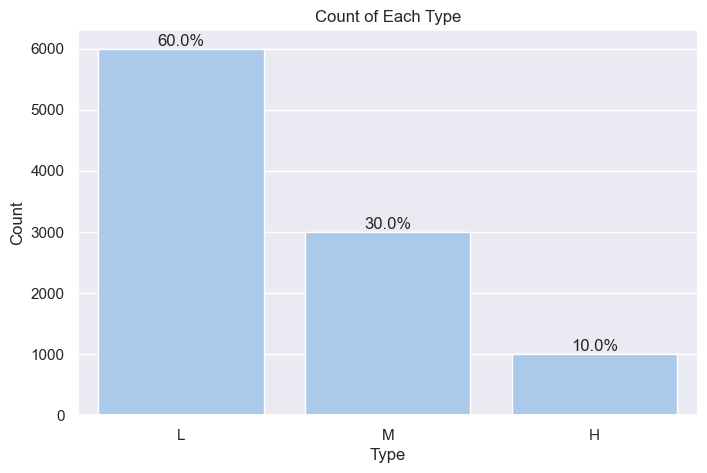

In [14]:
# plot value counts and percentage of Type
sns.set_theme(palette='pastel', context='notebook')
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

The dataset contains three product types; L, M, and H with an imbalanced distribution.
Type L represents 60% of all records, followed by Type M at 30%, and Type H at only 10%.

This imbalance indicates that most production activities are concentrated on Type L products, while Type H represents a smaller portion of operations.

In [15]:
# calculate size of Machine failure status
df.groupby('Machine failure').size()

Machine failure
0    9661
1     339
dtype: int64

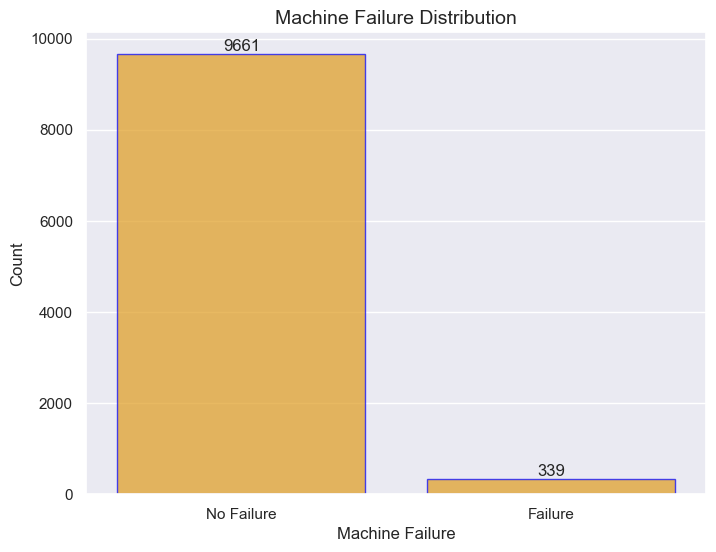

In [16]:
# visualization of Machine failure distribution
plt.figure(figsize=(8,6))
ax = sns.countplot(df, x="Machine failure", color= 'orange', alpha= 0.7, edgecolor= 'blue')
ax.set_title('Machine Failure Distribution', fontsize=14)
ax.set_xlabel('Machine Failure', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Failure', 'Failure'])

# add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fontsize=12)
plt.show()

The distribution of machine failure instances reveals a significant imbalance between operational and failure states. Out of 10,000 total records, 9,661 (96.6%) represent normal operation, while only 339 (3.4%) correspond to machine failures.

This imbalance indicates that machine breakdowns are relatively rare events compared to normal functioning.

In [17]:
# calculate size of Machine failure, grouped by Type
df.groupby(['Type', 'Machine failure']).size().unstack()

Machine failure,0,1
Type,,
H,982,21
L,5765,235
M,2914,83


[Text(0.5, 1.0, 'Machine Failure by Type'),
 Text(0.5, 0, 'Machine Failure'),
 Text(0, 0.5, 'Count')]

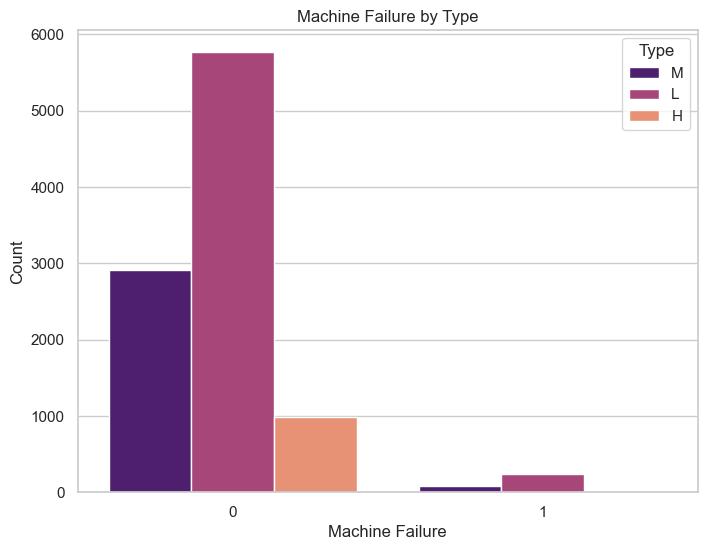

In [18]:
# visualization of Machine failure by Type
sns.set_theme(style='whitegrid', context='notebook')
plt.figure(figsize=(8,6))
p = sns.countplot(data=df, x='Machine failure', hue='Type', palette='magma')
p.set(title='Machine Failure by Type', xlabel='Machine Failure', ylabel='Count')

Machine failures are rare across all product types, though they are common. Type L, the most common product, has the highest number of failures, while Type H and Type M experience relatively fewer failures. This may reflect production volume differences rather than product-specific weaknesses.

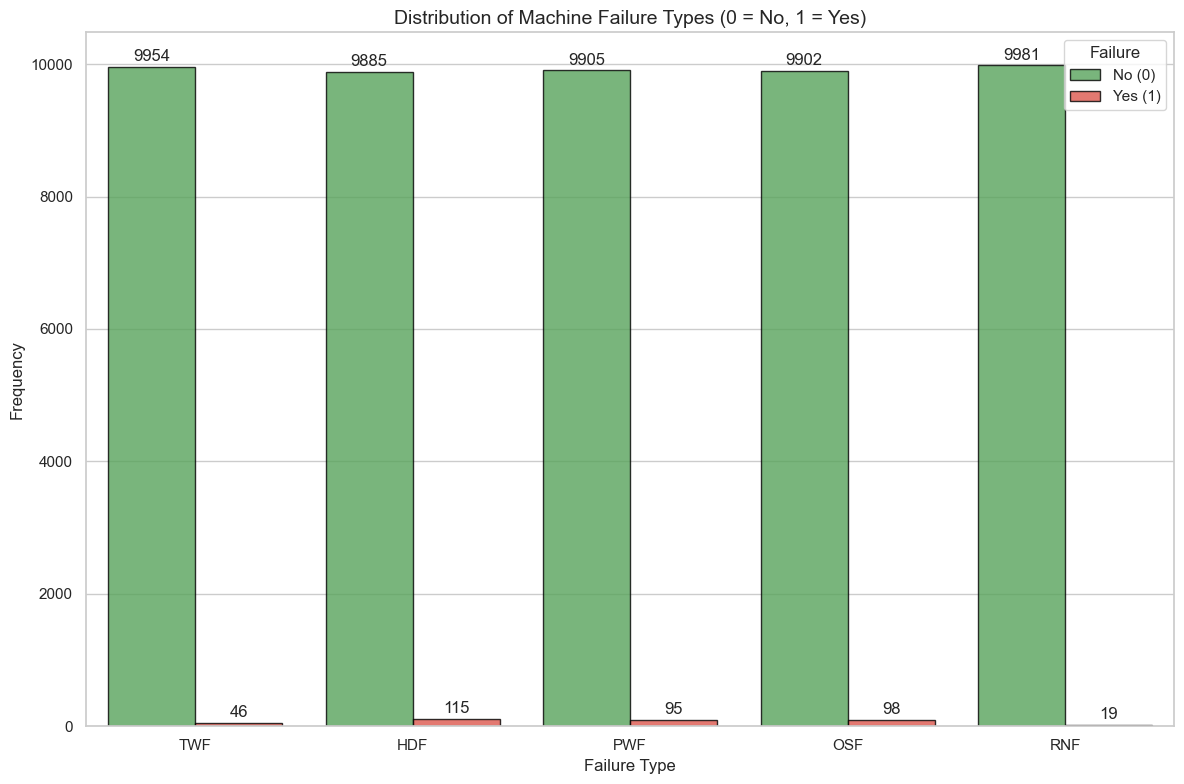

In [19]:
# visualize different types of machine failures
sns.set_theme(style='whitegrid', context='notebook')

# type of machine failure columns
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# convert data to long format (melt)
df_melted = df.melt(value_vars=failure_cols, var_name='Failure_Type', value_name='Failure_Status')
plt.figure(figsize=(12,8))
ax = sns.countplot(data=df_melted, x="Failure_Type", hue="Failure_Status",
                   palette=["#4CAF50", "#F44336"], edgecolor='black', alpha=0.8)  

# customize plot
ax.set_title("Distribution of Machine Failure Types (0 = No, 1 = Yes)", fontsize=14)
ax.set_xlabel("Failure Type")
ax.set_ylabel("Frequency")
ax.legend(title="Failure", labels=["No (0)", "Yes (1)"])

# add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=2)

plt.tight_layout()
plt.show()


All five failure types occur infrequently compared to normal operation. Heat Dissipation Failure (HDF) is the most common with 115 cases, followed by Power Failure (PWF), Overstrain Failure (OSF), and Tool Wear Failure (TWF). Random Failure (RNF) is the rarest, with only 19 instances.

This distribution highlights that while different failure mechanisms exist, each represents a small fraction of total operations—reinforcing the dataset’s overall reliability and the need for specialized handling of rare events during model training.

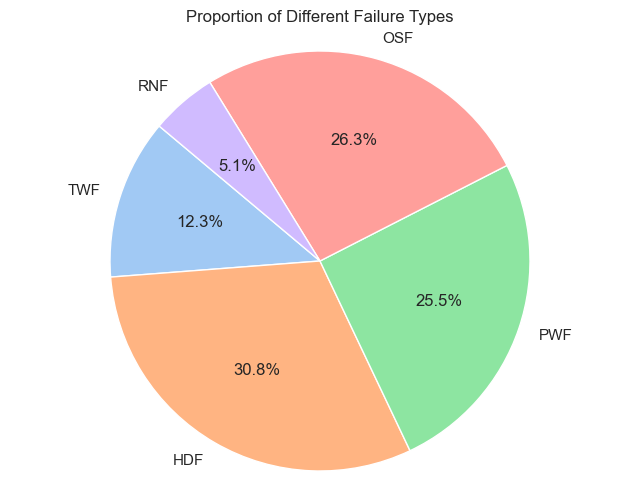

In [20]:
# pie chart for failure types
failure_sums = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.figure(figsize=(8, 6))  
plt.pie(failure_sums, labels=failure_sums.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Different Failure Types')  
plt.axis('equal') 
plt.show()

The **pie chart** illustrates the proportion of different machine failure types, showing how each failure category contributes to the total number of failures in the dataset.

The breakdown of machine failure types shows that Heat Dissipation Failure (HDF) is the most common, accounting for 30.8% of all failures. Overstrain Failure (OSF) and Power Failure (PWF) follow closely, representing 26.3% and 25.5%, respectively. Tool Wear Failure (TWF) makes up 12.3%, while Random Failure (RNF) is the least frequent at 5.1%.

These proportions indicate that thermal and mechanical stresses are the dominant contributors to equipment failure, guiding maintenance teams to prioritize temperature and load-related monitoring strategies.

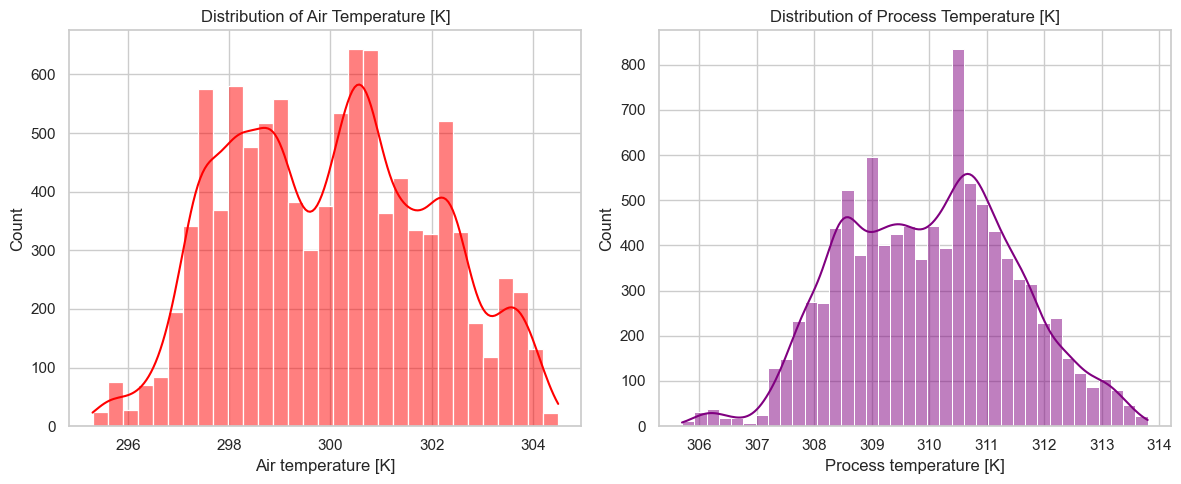

In [21]:
# distribution plots for temperature features
sns.set_theme(style='whitegrid', context='notebook')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Air temperature [K]'], kde=True, color='red')
plt.title('Distribution of Air Temperature [K]')

plt.subplot(1, 2, 2)
sns.histplot(df['Process temperature [K]'], kde=True, color='purple')
plt.title('Distribution of Process Temperature [K]')

plt.tight_layout()
plt.show()

Both air temperature and process temperature exhibit near-normal distributions centered around 300 K and 310 K, respectively. The small variations reflect stable operating conditions with slight fluctuations typical of normal production environments.

The close alignment between the two temperature curves supports the strong positive correlation observed earlier (r = 0.88), indicating effective thermal control and consistent process management across all operations.

[Text(0.5, 1.0, 'Air Temperature vs Process Temperature'),
 Text(0.5, 0, 'Air Temperature [K]'),
 Text(0, 0.5, 'Process Temperature [K]')]

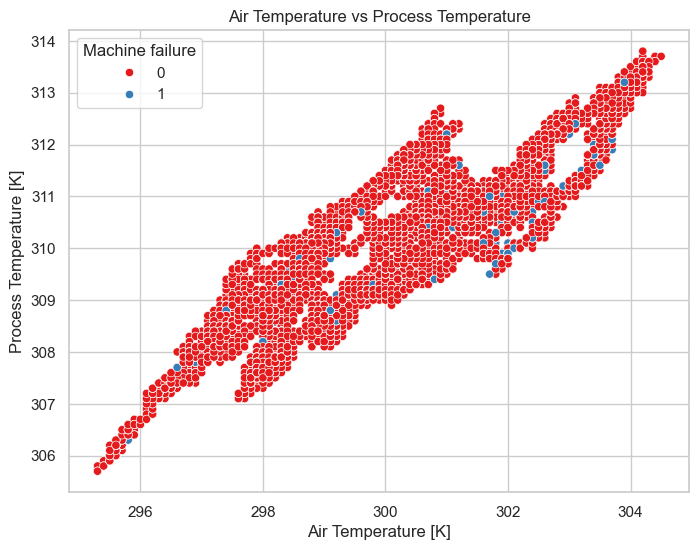

In [22]:
# scatter plot Air temperature vs Process temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df, hue='Machine failure', palette='Set1').set(title='Air Temperature vs Process Temperature',
                                                                                                                          xlabel='Air Temperature [K]', ylabel='Process Temperature [K]')

A strong positive relationship is observed between air temperature and process temperature, confirming the consistent thermal coupling in the system. As air temperature increases, process temperature rises proportionally, reflecting efficient heat transfer and stable environmental control.

Machine failures (blue points) are scattered uniformly across the range, indicating that temperature fluctuations alone are not a dominant factor in causing failures, but may still interact with other operational parameters in complex ways.

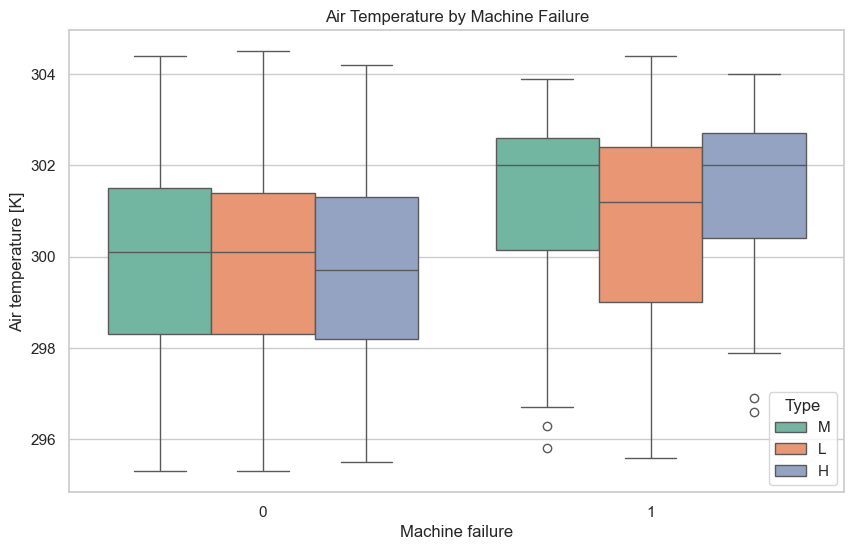

In [23]:
# boxplot of Air Temperature by Machine Failure
plt.figure(figsize=(10,6))
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=df, hue='Type', palette='Set2')
plt.title('Air Temperature by Machine Failure')
plt.show()

The **boxplot** illustrates the distribution of air temperature across machine failure conditions and product types. In general, machines that experienced failure tend to operate at slightly higher air temperatures, particularly for Type H and Type M products.

While the difference is not large, this trend suggests that elevated air temperatures may contribute to increased stress on certain product types, potentially influencing failure likelihood when combined with other operational factors.

In [24]:
# calculate mean, max, min of Air temperature and Process temperature grouped by Type and Machine failure
multi_key_group = df.groupby(['Type', 'Machine failure'])[['Air temperature [K]', 'Process temperature [K]']].agg(['mean', 'max', 'min']).reset_index()
print(multi_key_group)

  Type Machine failure Air temperature [K]                \
                                      mean    max    min   
0    H               0          299.839511  304.2  295.5   
1    H               1          301.152381  304.0  296.6   
2    L               0          299.985637  304.5  295.3   
3    L               1          300.756596  304.4  295.6   
4    M               0          299.996294  304.4  295.3   
5    M               1          301.186747  303.9  295.8   

  Process temperature [K]                
                     mean    max    min  
0              309.917413  313.5  305.9  
1              310.314286  313.2  307.4  
2              310.002671  313.8  305.7  
3              310.248511  313.7  306.1  
4              310.007859  313.8  305.7  
5              310.402410  313.2  306.3  


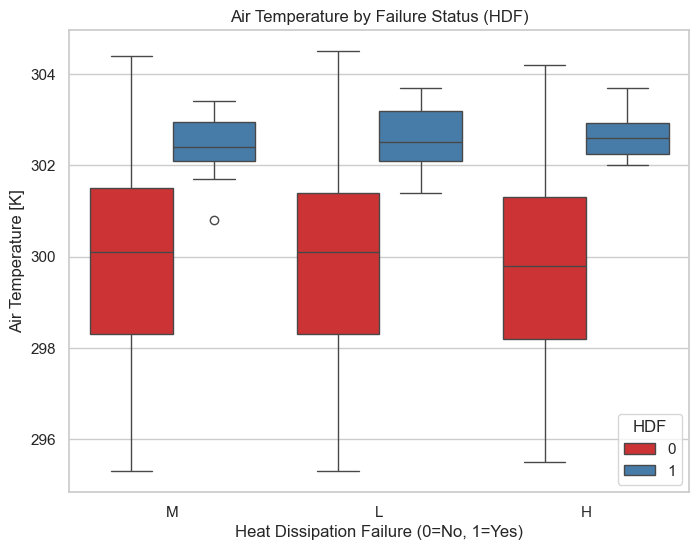

In [25]:
# HDF failure air temperature analysis
hdf_temp = df[df['HDF'] == 1]['Air temperature [K]']
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Type", y="Air temperature [K]", palette="Set1", hue="HDF")
plt.title("Air Temperature by Failure Status (HDF)")
plt.xlabel("Heat Dissipation Failure (0=No, 1=Yes)")
plt.ylabel("Air Temperature [K]")
plt.show()

The **boxplot** shows a clear distinction in air temperature between normal and heat dissipation failure conditions. Across all product types (M, L, and H), failures tend to occur at higher air temperatures, typically above 302 K.

This pattern suggests that elevated ambient temperature may reduce cooling efficiency, leading to HDF events. The consistency of this trend across all types highlights temperature as a key predictive indicator for this failure mode.

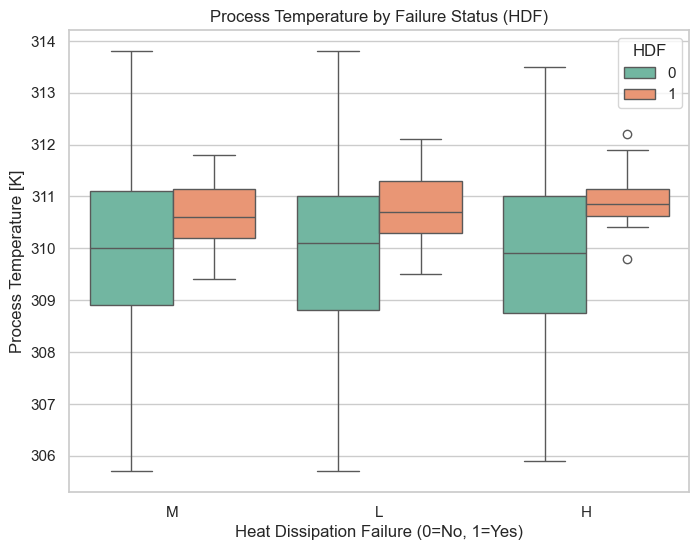

In [26]:
# HDF failure process temperature analysis
hdf_process_temp = df[df['HDF'] == 1]['Process temperature [K]']
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Type", y="Process temperature [K]", palette="Set2", hue="HDF")
plt.title("Process Temperature by Failure Status (HDF)")
plt.xlabel("Heat Dissipation Failure (0=No, 1=Yes)")
plt.ylabel("Process Temperature [K]")
plt.show()

In all three types, the orange boxes (representing failures) show slightly higher median process temperatures than the green boxes (representing no failures), suggesting that higher process temperatures may be linked to heat dissipation issues.

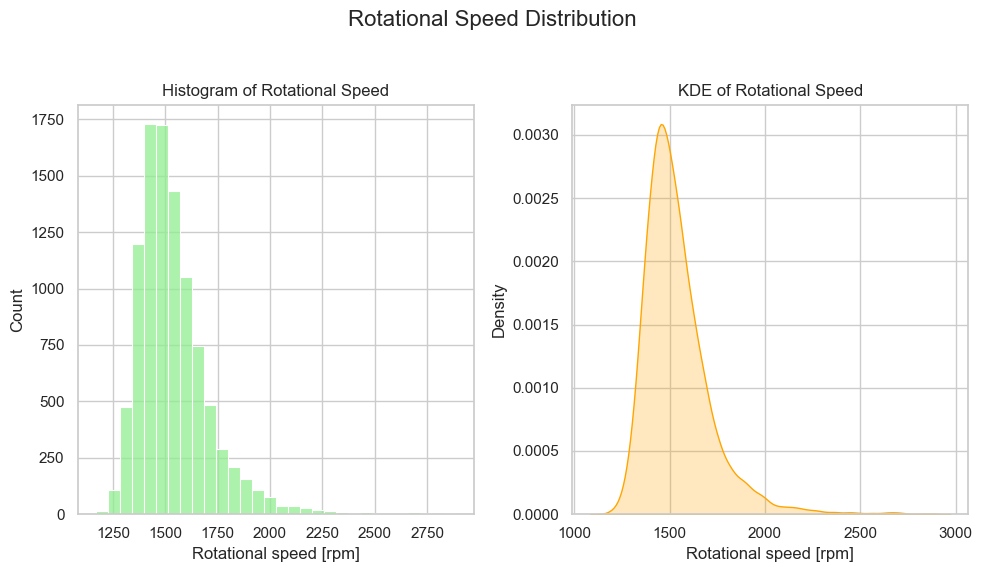

In [27]:
# distribution plots for Rotational speed
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(df['Rotational speed [rpm]'], bins=30, kde=False, color='lightgreen', ax=axes[0])
axes[0].set_title('Histogram of Rotational Speed')
sns.kdeplot(df['Rotational speed [rpm]'], shade=True, color='orange', ax=axes[1])
axes[1].set_title('KDE of Rotational Speed')
plt.suptitle('Rotational Speed Distribution', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

This **histogram** represents the frequency distribution of data and **Kernel Density Estimate (KDE) plot** shows the probability density of a continuous variable.

The rotational speed of machines ranges from approximately 1,200 to 2,800 rpm, with a clear concentration around 1,500 rpm. The distribution is right-skewed, indicating that most machines operate at moderate speeds while only a few reach higher rpm levels.

This consistent operational pattern suggests a stable process setup, with occasional high-speed instances likely representing specialized production or stress-test scenarios.

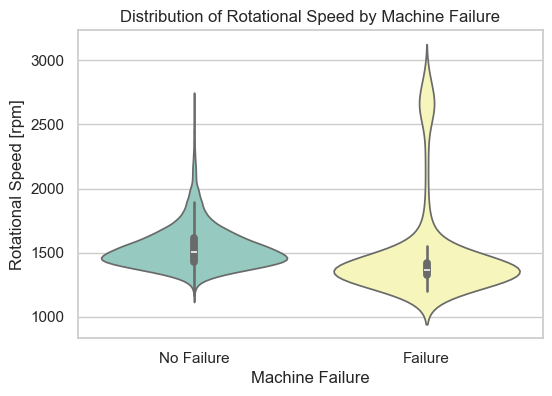

In [28]:
# violinplot to visualize the distribution of 'Rotational speed [rpm]' for machines with and without failure
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x="Machine failure", y="Rotational speed [rpm]", palette="Set3")
plt.title("Distribution of Rotational Speed by Machine Failure")
plt.xlabel("Machine Failure")
plt.ylabel("Rotational Speed [rpm]")
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.show()

The **violin plot** shows that machines operating at lower rotational speeds are more prone to failure. While most non-failure cases cluster around 1,500 rpm, failure cases display a wider spread and several high-speed outliers above 2,500 rpm.

This suggests that both extremely low and high speeds may increase the likelihood of mechanical stress or instability, making rotational speed an important factor to monitor in predictive maintenance analysis.

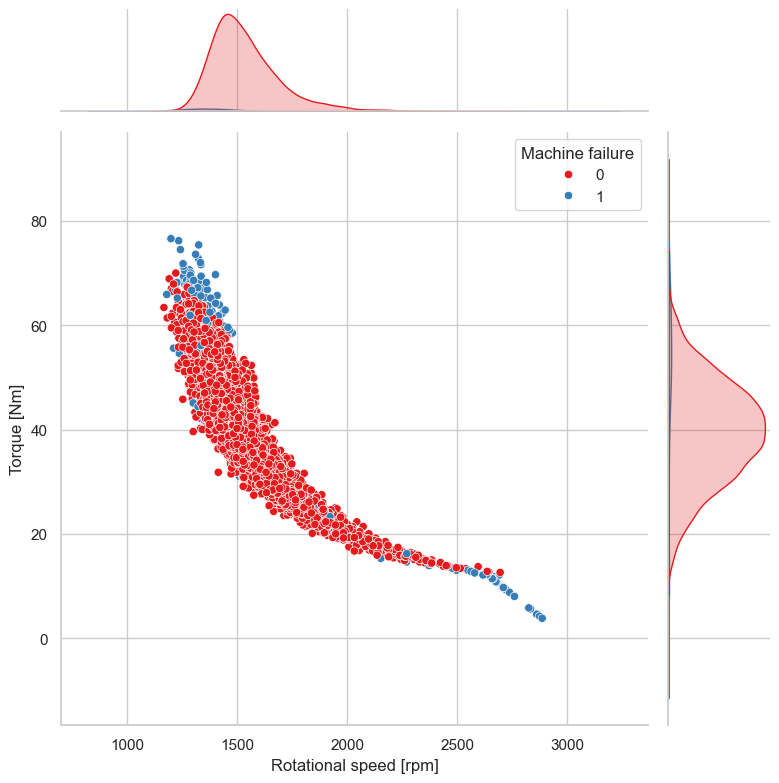

In [29]:
# joint plot of Rotational Speed vs Torque colored by Machine Failure
sns.jointplot(data=df, x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette='Set1', kind='scatter', height=8)

The **joint plot** shows a strong inverse relationship between torque and rotational speed. As speed increases, torque decreases sharply. Most machine failures (blue points) occur at lower speeds with higher torque values, suggesting that mechanical stress under heavy load contributes to failure incidents.

This relationship aligns with typical industrial behavior, where high torque at low speeds increases strain on components, emphasizing the importance of load monitoring in predictive maintenance systems.

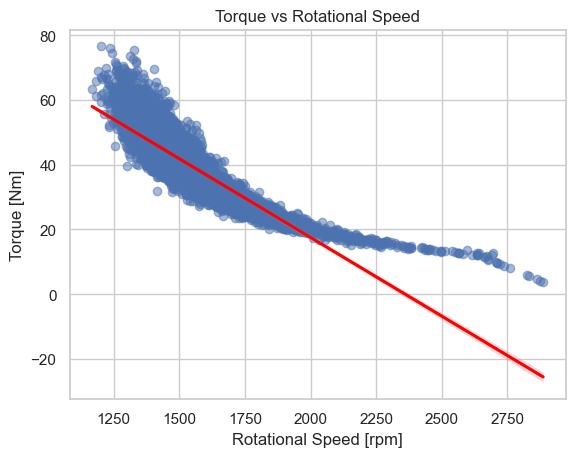

In [30]:
# regplot of Torque vs Rotational Speed
p = sns.regplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
p = p.set(title='Torque vs Rotational Speed', xlabel='Rotational Speed [rpm]', ylabel='Torque [Nm]')

This **regression plot** illustrates a strong negative correlation between torque and rotational speed. 

[Text(0.5, 1.0, 'Torque by Failure Status (PWF)'),
 Text(0.5, 0, 'Power Failure (0=No, 1=Yes)'),
 Text(0, 0.5, 'Torque [Nm]')]

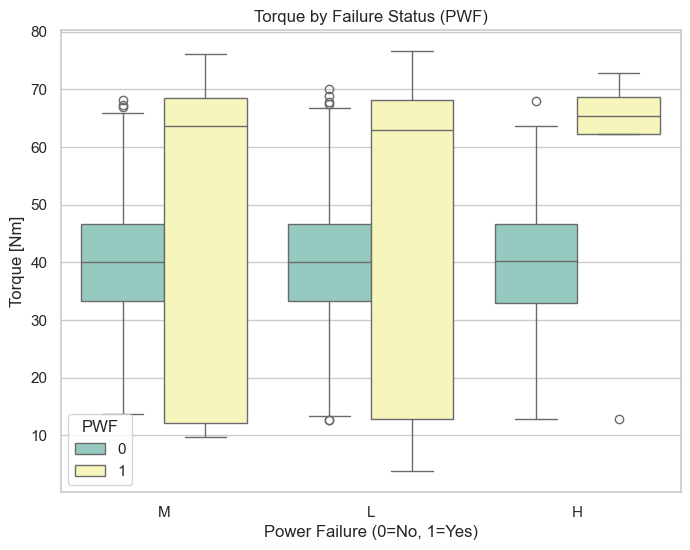

In [31]:
# PWF failure torque analysis
pwf_torque = df[df['PWF'] == 1]['Torque [Nm]']
plt.figure(figsize=(8,6))   
sns.boxplot(data=df, x="Type", y="Torque [Nm]", palette="Set3", hue="PWF").set(title="Torque by Failure Status (PWF)", xlabel= "Power Failure (0=No, 1=Yes)", ylabel= "Torque [Nm]")

This **boxplot** shows the relationship between torque (Nm) and power failure (PWF) conditions for different machine types (M, L, and H). Comparing the torque distributions of machines without power failure (0) and those experiencing a failure (1) allows visualization of how torque behavior differs under fault conditions.

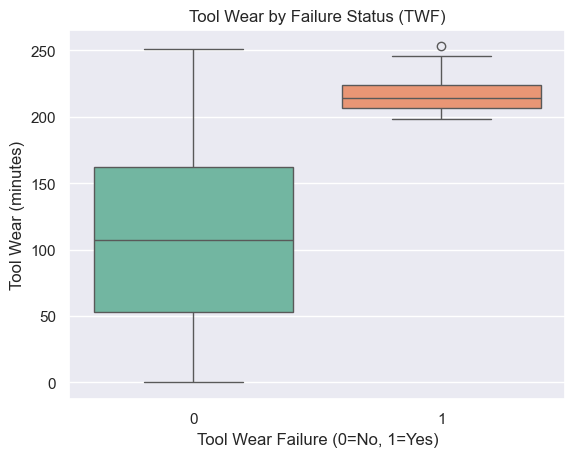

In [32]:
# boxplot of Tool Wear by TWF failure status
sns.set_theme()
sns.boxplot(data=df, x="TWF", y="Tool wear [min]", palette="Set2")
plt.title("Tool Wear by Failure Status (TWF)")
plt.xlabel("Tool Wear Failure (0=No, 1=Yes)")
plt.ylabel("Tool Wear (minutes)")
plt.show()

The **boxplot** clearly shows that tool wear failures occur at significantly higher wear levels, typically above 200 minutes. In contrast, non-failure cases are spread across a wider range, with many observations below 100 minutes.

This pattern indicates a strong relationship between tool usage time and failure likelihood, emphasizing the importance of preventive tool replacement to avoid breakdowns and maintain operational efficiency.

In [33]:
# calculate average Tool wear by Type
single_key_group = df.groupby('Type')['Tool wear [min]'].mean().reset_index()
print(single_key_group)

  Type  Tool wear [min]
0    H       107.419741
1    L       108.378833
2    M       107.272272


Text(0.4, 0.9, 'This looks interesting!')

<Figure size 1200x500 with 0 Axes>

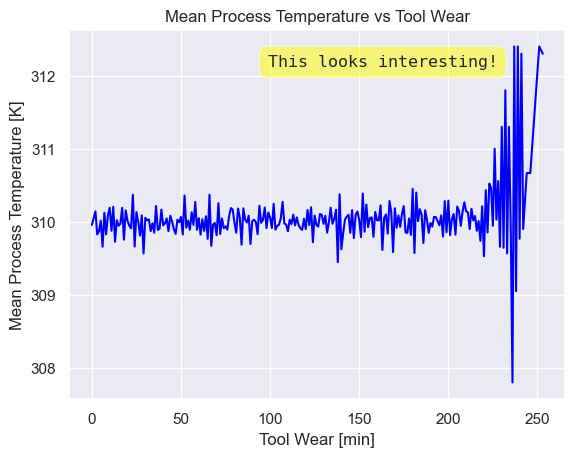

In [34]:
# mean air temperature and tool wearing rate by machine failure
mean_temp_toolwear = df.groupby('Tool wear [min]')[['Process temperature [K]']].mean().reset_index()

# lineplot of mean process temperature vs tool wear
plt.figure(figsize=(12,5))
fig, ax = plt.subplots()
ax.plot(mean_temp_toolwear['Tool wear [min]'], mean_temp_toolwear['Process temperature [K]'], color='blue')
ax.set_title('Mean Process Temperature vs Tool Wear')
ax.set_xlabel('Tool Wear [min]')
ax.set_ylabel('Mean Process Temperature [K]')
ax.text(0.4, 0.9, 'This looks interesting!', family ='monospace', fontsize=12, transform=ax.transAxes,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

The **line plot** illustrates the relationship between Mean Process Temperature and Tool Wear time. For the first 200 minutes, the process temperature remains relatively stable around 310 K, indicating consistent operating conditions. However, after approximately 230 minutes, a noticeable increase and fluctuation in temperature is observed. This sharp variation may signify tool degradation or approaching failure, as friction and heat generation typically rise when a tool nears the end of its useful life

In [35]:
# calculate mean and standard deviation of selected features grouped by Machine failure
df.groupby("Machine failure")[["Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]].agg(["mean", "std"])

Rotational speed [rpm]             Torque [Nm]             \
                                  mean         std        mean        std   
Machine failure                                                             
0                          1540.260014  167.394734   39.629655   9.472080   
1                          1496.486726  384.943547   50.168142  16.374498   

                Tool wear [min]             
                           mean        std  
Machine failure                             
0                    106.693717  62.945790  
1                    143.781711  72.759876

Text(0, 0.5, 'Torque [Nm]')

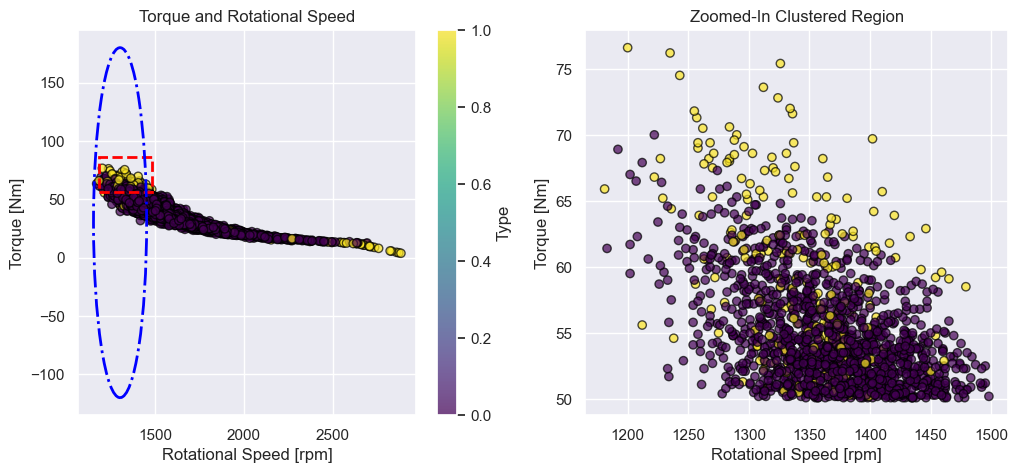

In [36]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes[0]
sc = ax.scatter(df['Rotational speed [rpm]'], 
                df['Torque [Nm]'], 
                c=df['Machine failure'], 
                cmap='viridis', alpha=0.7, edgecolor='black')

ax.set_title("Torque and Rotational Speed")
ax.set_xlabel("Rotational Speed [rpm]")
ax.set_ylabel("Torque [Nm]")

rect = mpatches.Rectangle((1180, 56), 300, 30, linewidth=2, 
                          edgecolor='red', facecolor='none', linestyle='--')
ax.add_patch(rect)

circle = mpatches.Circle((1300, 30), 150, linewidth=2, 
                         edgecolor='blue', facecolor='none', linestyle='-.')
ax.add_patch(circle)

plt.colorbar(sc, ax=ax, label='Type')

ax2 = axes[1]
zoom = df[(df['Rotational speed [rpm]'] > 1180) & 
          (df['Rotational speed [rpm]'] < 1500) & 
          (df['Torque [Nm]'] > 50) & 
          (df['Torque [Nm]'] < 80)]

ax2.scatter(zoom['Rotational speed [rpm]'], 
            zoom['Torque [Nm]'], 
            c=zoom['Machine failure'], cmap='viridis', alpha=0.7, edgecolor='black')

ax2.set_title("Zoomed-In Clustered Region")
ax2.set_xlabel("Rotational Speed [rpm]")
ax2.set_ylabel("Torque [Nm]")

The plots display the relationship between Torque and Rotational Speed, with data points colored by machine type.
In the left subplot, a general inverse relationship is observed, as rotational speed increases, torque tends to decrease. The highlighted red rectangular and blue elliptical regions mark areas of higher data concentration and variance, corresponding to the clustered regions discussed in the OSF lecture. These areas may indicate different machine operating conditions or tool wear behaviors.

The right subplot zooms into the selected cluster, revealing two distinct sub-groups with different torque distributions. The upper cluster (yellow points) shows slightly higher torque at lower rotational speeds. 

The visualization design in this section was inspired by the lecture example on highlighting clustered regions using rectangular and circular patches.
I used OpenAI’s ChatGPT (GPT-5) to assist with code structuring for subplot creation and patch styling (rectangle and circle annotations).

In [37]:
# save the figure
fig.savefig("Zoomedin.png", dpi=600)

### **2.3. Modelling Approaches**

#### **2.3.1. Logistic Reggression**
**Logistic Regression** is a supervised machine learning algorithm used for **binary classification problems**, where the target variable has two possible outcomes; for example, *machine failure (1)* or *no failure (0)*.

Unlike linear regression, which predicts continuous values, logistic regression predicts **probabilities**. It uses the **logistic (sigmoid) function** to map any real-valued input into a range between 0 and 1.

* If the predicted probability is **greater than 0.5**, the output is classified as **1 (failure)**.
* If it is **less than 0.5**, the output is classified as **0 (no failure)**.

In predictive maintenance, logistic regression helps identify which operational parameters significantly contribute to the probability of a machine failure, enabling **early intervention and risk-based maintenance scheduling**.

In [38]:
# convert categorical variable 'Type' to numerical using one-hot encoding
X = pd.get_dummies(df, columns=['Type'], drop_first=False)

In [39]:
# drop target and failure type columns from features
X= X.drop(["Machine failure", "TWF", "HDF", "PWF", "RNF", "OSF"], axis=1)
y = df['Machine failure']

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Type_H                   10000 non-null  bool   
 6   Type_L                   10000 non-null  bool   
 7   Type_M                   10000 non-null  bool   
dtypes: bool(3), float64(3), int64(2)
memory usage: 420.1 KB


In [41]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train logistic regression model
model = LogisticRegression()

# fit the model on training data
model.fit(X_train, y_train)

# make predictions on the test set  
y_pred = model.predict(X_test)

# evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1930    9]
 [  43   18]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.67      0.30      0.41        61

    accuracy                           0.97      2000
   macro avg       0.82      0.65      0.70      2000
weighted avg       0.97      0.97      0.97      2000



The confusion matrix and classification metrics summarize the model’s predictive performance on the test set.

The model achieved an overall accuracy of 97%, correctly identifying most of the non-failure cases. For the non-failure class (0), precision and recall were exceptionally high (0.98 and 1.00, respectively), indicating reliable detection of normal operations.

However, for the failure class (1), performance was more limited, with precision = 0.67 and recall = 0.30, resulting in an F1-score of 0.41. This suggests that while the model can correctly identify some failures, it still misses a significant number of actual failure events, likely due to the class imbalance in the dataset.

To improve recall for failure prediction, future iterations could explore resampling techniques (SMOTE, class weighting) or ensemble methods to better capture minority failure patterns without sacrificing overall accuracy.

[Text(0.5, 1.0, 'Feature Importance based on Logistic Regression Coefficients'),
 Text(0.5, 0, 'Importance'),
 Text(0, 0.5, 'Feature')]

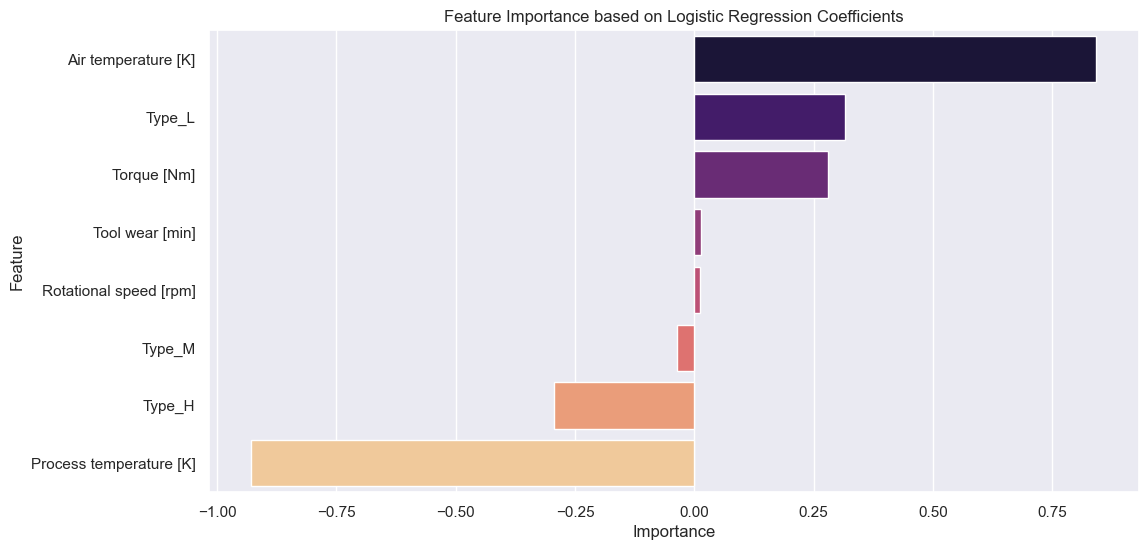

In [42]:
# estimated relative predictor importance of the features used in the complex decision tree as described and implemented in
importances = model.coef_[0]
feature_names = X.columns

# create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma').set(title = 'Feature Importance based on Logistic Regression Coefficients', xlabel ='Importance', ylabel ='Feature')

The **bar plot** visualizes the feature importance derived from Logistic Regression coefficients.
Features such as Air temperature [K], Type_L, and Torque [Nm] have the highest positive influence on the machine failure prediction, while Process temperature [K] shows a strong negative contribution, indicating that higher process temperatures are associated with lower failure probability.
This analysis highlights how logistic regression can capture directional effects of individual variables in predictive maintenance modeling.

## **3. Conclusion**

This study explored the relationships among process parameters, including torque, rotational speed, tool wear, air temperature, and process temperature, to identify indicators of potential machine failure.
Exploratory data analysis revealed distinct patterns: temperature and torque values tended to fluctuate as tool wear increased, especially after prolonged operation, suggesting early warning signs of mechanical degradation.

Visualizations emphasized the importance of examining localized regions of variation, consistent with classroom discussions on operational stability and tool wear patterns.

The logistic regression model further quantified these effects, identifying Air temperature and Torque as the most influential positive predictors, while Process temperature showed a strong negative association with failure likelihood.

These results highlight that process conditions, when continuously monitored, can serve as reliable predictors for preventive maintenance strategies, reducing unplanned downtime and improving operational efficiency.

Overall, the project demonstrated that integrating EDA, visualization, and interpretable machine learning methods can yield meaningful insights for industrial reliability improvement. By identifying these feature relationships, maintenance teams can take proactive measures such as real-time temperature monitoring, torque threshold alerts, and scheduled tool replacement, leading to improved operational continuity and reduced downtime.


### **References**

[1] H. Lee, D. S. Kim, Y. T. Ryu, and B. Simon, “AI4I 2020 Predictive Maintenance Dataset,” UCI Machine Learning Repository, 2020. [Online]. Available: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

[2] S. Matzka, “Explainable Artificial Intelligence for Predictive Maintenance Applications,” School of Engineering - Technology and Life, Hochschule für Technik und Wirtschaft Berlin, Berlin, Germany, 2021.

[3] OpenAI, “ChatGPT (GPT-5.1): Large Language Model,” OpenAI, 2025.
Available: https://openai.com/chatgpt

This assignment was completed with partial assistance from OpenAI’s ChatGPT (GPT-5). The model was used for some brainstorming EDA strategies, grammar editing, and minor debugging suggestions.